In [1]:
# importing basic packages
import numpy as np
import pandas as pd

# importing package for ploting graphs
import matplotlib.pyplot as plt

## It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The link here is a dataset for fraud detection Link.

Description of the dataset
1)Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
2)V1-V28: Result of a PCA Dimensionality reduction to protect user identities and sensitive features

In [2]:
#Loading the dataset
datset=pd.read_csv('creditcard.csv')

In [3]:
datset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#Datatypes of dataframe
datset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
#Finding Null Values
datset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Feature Matrix Creation
X=datset.drop('Class',axis=1)

In [7]:
#Label Matrix
y=datset["Class"]

In [8]:
#importing packages to split into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42) #test size 20%

# Applying KNN Classification

### Applying KNN Before Standardizing data

In [9]:
#Importing package for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2) #as Binary classification we have taken n_neighbors=2 
neigh.fit(X_train, y_train) #Fit the model using X as training data and y as target values
y_pred=neigh.predict(X_test) #Predict the class labels for the provided data

In [10]:
#importing packages for calculating metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
result = confusion_matrix(y_test, y_pred) #Confusion Matrix
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred) #Classification Report
print("Classification Report:",)
print (result1)
Accuracy_of_KNN_Before_Normalization_of_data = accuracy_score(y_test,y_pred) #Accuracy Score
print("Accuracy of KNN Before Standardizing data:",Accuracy_of_KNN_Before_Normalization_of_data)

Confusion Matrix:
[[56864     0]
 [   90     8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.08      0.15        98

    accuracy                           1.00     56962
   macro avg       1.00      0.54      0.58     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of KNN Before Standardizing data: 0.9984199992977775


### Applying KNN After Standardizing data

In [12]:
#Feature Scaling or Standardization of Data Using Standard Scalar

#Importing Packages for Standard scalar
#Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #Compute the mean and std to be used for later scaling
X_train = scaler.transform(X_train) #Perform standardization by centering and scaling
X_test = scaler.transform(X_test) #Perform standardization by centering and scaling

In [13]:
#Applying KNN on the Standardized data
#distance-based method

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2) #as Binary classification we have taken n_neighbors=2
neigh.fit(X_train, y_train)  #Fit the model using X as training data and y as target values
y_pred=neigh.predict(X_test) #Predict the class labels for the provided data

In [14]:
result = confusion_matrix(y_test, y_pred)#Confusion Matrix
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)#classification Report
print("Classification Report:",)
print (result1)
Accuracy_KNN_After_Normalization_of_data = accuracy_score(y_test,y_pred) #Accuracy score
print("Accuracy of KNN After Standardizing data:",Accuracy_KNN_After_Normalization_of_data)

Confusion Matrix:
[[56861     3]
 [   28    70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of KNN After Standardizing data: 0.9994557775359011


### Applying Naïve Bayes

In [15]:
#Importing pacakages for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [16]:
dataset=pd.read_csv('creditcard.csv')
X=datset.drop('Class',axis=1)
y=datset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)#test size 20%

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train) #Fit Gaussian Naive Bayes according to X, y
y_pred=gnb.predict(X_test) #Perform classification on an array of test vectors X

In [18]:
result = confusion_matrix(y_test, y_pred) #Confusion Matrix
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred) #Classificaion Report
print("Classification Report:",)
print (result1)
Accuracy_Gaussian_Naive_Bayes = accuracy_score(y_test,y_pred) #Accuracy Score
print("Accuracy of Gaussian Naive Bayes:",Accuracy_Gaussian_Naive_Bayes)

Confusion Matrix:
[[56502   362]
 [   36    62]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962

Accuracy of Gaussian Naive Bayes: 0.9930128857835048


### Applying SVM

In [19]:
#Feature Scaling or Standardization of Data Using Standard Scalar

#Importing Packages for Standard scalar
#Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #Compute the mean and std to be used for later scaling
X_train = scaler.transform(X_train) #Perform standardization by centering and scaling
X_test = scaler.transform(X_test)  #Perform standardization by centering and scaling

In [20]:
#importing Packages for SVC
from sklearn.svm import SVC

In [21]:
#Applying SVC on the Standardized data
#distance-based method
svc=SVC()
svc.fit(X_train, y_train) #Fit the SVM model according to the given training data
y_pred=svc.predict(X_test) #Perform classification on samples in X

In [22]:
result = confusion_matrix(y_test, y_pred) #confusion Matrix
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred) #Classification Report
print("Classification Report:",)
print (result1)
Accuracy_SVM = accuracy_score(y_test,y_pred)#Accuracy Score
print("Accuracy of SVM:",Accuracy_SVM)

Confusion Matrix:
[[56862     2]
 [   37    61]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of SVM: 0.9993153330290369


### Applying Random Forest

In [23]:
dataset=pd.read_csv('creditcard.csv')
X=datset.drop('Class',axis=1)
y=datset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42) #test size is 20%

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train) #Build a forest of trees from the training set (X, y)
y_pred=rfc.predict(X_test) #Predict class for X

In [26]:
result = confusion_matrix(y_test, y_pred) #Confusion Matrix
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred) #Classification Report
print("Classification Report:",)
print (result1)
Accuracy_Random_Forest_Classifier = accuracy_score(y_test,y_pred) #Accuracy Score
print("Accuracy of Random Forest Classifier:",Accuracy_Random_Forest_Classifier)

Confusion Matrix:
[[56861     3]
 [   23    75]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Random Forest Classifier: 0.9995435553526912


### performance

In [27]:
print("Accuracy of KNN Before Standardizing data:",Accuracy_of_KNN_Before_Normalization_of_data)
print("Accuracy of KNN After Standardizing data:",Accuracy_KNN_After_Normalization_of_data)
print("Accuracy of Gaussian Naive Bayes:",Accuracy_Gaussian_Naive_Bayes)
print("Accuracy of SVM:",Accuracy_SVM)
print("Accuracy of Random Forest Classifier:",Accuracy_Random_Forest_Classifier)

Accuracy of KNN Before Standardizing data: 0.9984199992977775
Accuracy of KNN After Standardizing data: 0.9994557775359011
Accuracy of Gaussian Naive Bayes: 0.9930128857835048
Accuracy of SVM: 0.9993153330290369
Accuracy of Random Forest Classifier: 0.9995435553526912


### Visualize the number of samples per class (This is a binary classification, 0: Non-Fraud and 1: Fraud) and report your observation

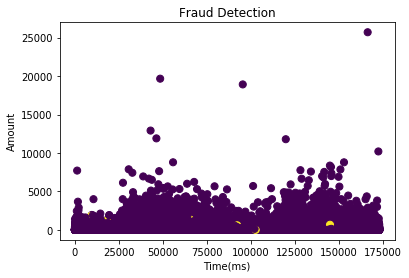

In [28]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,29],c=y_train,s=50,cmap='viridis')
plt.title("Fraud Detection")
plt.xlabel("Time(ms)")
plt.ylabel("Amount")
plt.show();

### This dataset is unbalanced meaning we don’t have equal number of samples per class. Consequently, we need specific techniques when dealing with unbalanced dataset. Please study one of the techniques or challenges we face while working on unbalanced dataset and discuss it shortly

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [29]:
dataset=pd.read_csv('creditcard.csv')
X=datset.drop('Class',axis=1)
y=datset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5, random_state=42) #test size 50%

When faced with this situation, what steps can be taken to solve it?

Resample the dataset:

Undersampling: The idea is to reduce the ratio of instances in the majority and minority levels. You can randomly select observations in the desired ratio — 50/50, 60/40 in a binary case

In [30]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train) #Build a forest of trees from the training set (X, y)
y_pred=rfc.predict(X_test) #Predict class for X

In [31]:
result = confusion_matrix(y_test, y_pred) #Confusion Matrix
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)  #Classification Report
print("Classification Report:",)
print (result1)
Accuracy_Random_Forest_Classifier_Undersampling = accuracy_score(y_test,y_pred) #Accuracy Score
print("Accuracy of Random Forest Classifier with Undersampling:",Accuracy_Random_Forest_Classifier_Undersampling)

Confusion Matrix:
[[142149      9]
 [    62    184]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.95      0.75      0.84       246

    accuracy                           1.00    142404
   macro avg       0.98      0.87      0.92    142404
weighted avg       1.00      1.00      1.00    142404

Accuracy of Random Forest Classifier with Undersampling: 0.9995014184994804


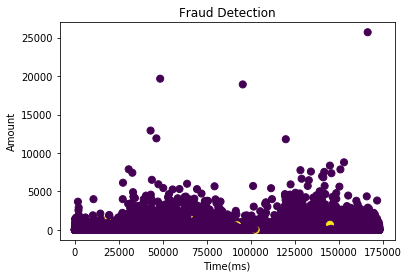

In [32]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,29],c=y_train,s=50,cmap='viridis')
plt.title("Fraud Detection")
plt.xlabel("Time(ms)")
plt.ylabel("Amount")
plt.show();